# 머신러닝 3장

k-최근접 이웃 분류 : 샘플 주변을 보고 샘플의 클래스로 예측  
k-최근접 이웃 회귀 : 샘플 주변 이웃의 평균으로 샘플의 값을 구함

### - 농어(perch)의 길이로 무게를 잘 예측할 수 있을까?

In [1]:
# 필요할 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5,	27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                     	36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0,	40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])

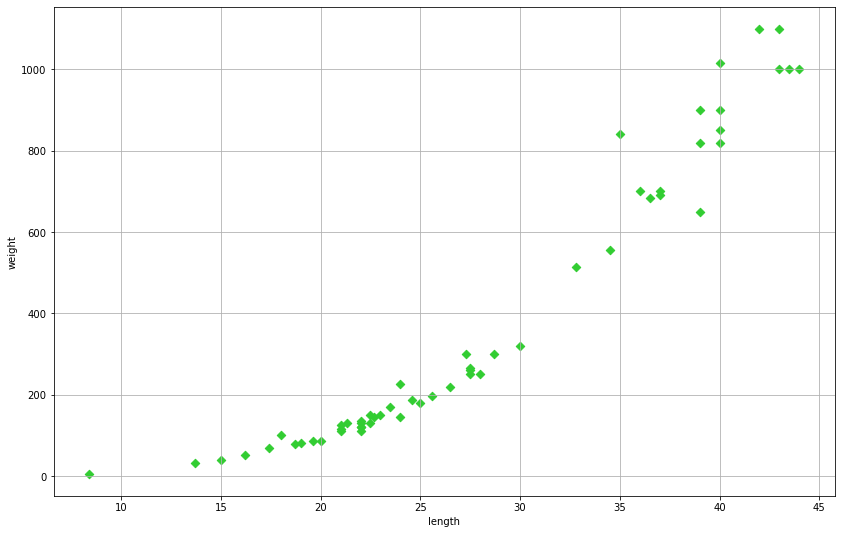

In [24]:
# 산점도 확인
plt.figure(figsize=(14,9))
plt.scatter(perch_length, perch_weight, marker='D', color ='limegreen')
plt.xlabel('length')
plt.ylabel('weight')
plt.grid(True)
plt.show()

훈련 세트와 테스트 세트 준비

In [27]:
# 라이브러리 import
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 준비
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [28]:
# 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


k-최근접 이웃 회귀 알고리즘 정확도 계산

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# 모델 생성
knr = KNeighborsRegressor()

# 모델 훈련
knr.fit(train_input, train_target)

# 모델 점수 확인, 결정 계수(R2)를 리턴
print(knr.score(test_input, test_target))

0.992809406101064


### 결정계수란?
##### 회귀식이 얼마나 정확하지를 나타내는 숫자
- 0에 가까울수록 정확도가 낮음
- 1에 가까울수록 정확도는 높음

### 평균 절대 오차(MAE : mean absolute error)
##### 실제 값과 예측 값의 절대값 오차 평균 (에러의 크기를 반영)

In [33]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측값 계산
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862
